In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath("/Users/adairkovac/dev/turbulence-CFOG-7710"))

from data import data_loader
import pandas as pd

In [2]:
vis = data_loader.load_raw_visibility_data()

<AxesSubplot:xlabel='time'>

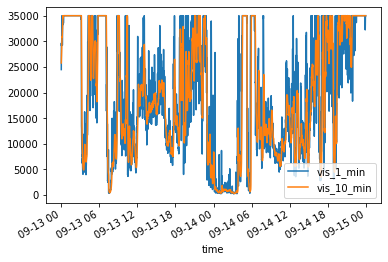

In [3]:
vis.plot(x="time")

In [4]:
formation = []
dissipation = []

threshold = 1000
last = 10000000
for i, row in vis.iterrows():
    current = row["vis_10_min"]
    if last < threshold and current >= threshold:
        dissipation.append(row["time"])
    if last >= threshold and current < threshold:
        formation.append(row["time"])
    last = current
    
print(formation)
print(dissipation)

[Timestamp('2018-09-13 07:31:00'), Timestamp('2018-09-14 00:23:41'), Timestamp('2018-09-14 00:35:41'), Timestamp('2018-09-14 01:25:40'), Timestamp('2018-09-14 01:43:40'), Timestamp('2018-09-14 01:52:40'), Timestamp('2018-09-14 01:59:40'), Timestamp('2018-09-14 02:27:39'), Timestamp('2018-09-14 02:34:39'), Timestamp('2018-09-14 02:40:39'), Timestamp('2018-09-14 05:43:35')]
[Timestamp('2018-09-13 07:50:00'), Timestamp('2018-09-14 00:33:41'), Timestamp('2018-09-14 01:20:40'), Timestamp('2018-09-14 01:37:40'), Timestamp('2018-09-14 01:50:40'), Timestamp('2018-09-14 01:53:40'), Timestamp('2018-09-14 02:26:39'), Timestamp('2018-09-14 02:33:39'), Timestamp('2018-09-14 02:37:39'), Timestamp('2018-09-14 03:50:37'), Timestamp('2018-09-14 05:51:35')]


(17787.875, 17788.270833333332)

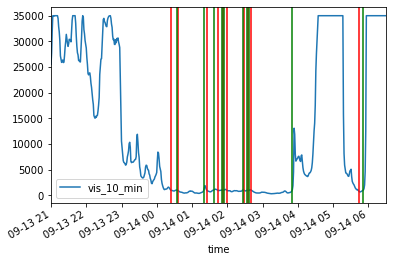

In [5]:
import matplotlib.pyplot as plt

vis.plot(x="time", y="vis_10_min")

for line in formation:
    plt.axvline(line, color="red")
for line in dissipation:
    plt.axvline(line, color="green")
    
plt.xlim(pd.Timestamp('2018-09-13 21:00:00'), pd.Timestamp('2018-09-14 06:30:00'))

In [16]:
import matplotlib.dates as mdates
import matplotlib.units as munits
import numpy as np
converter = mdates.ConciseDateConverter()  # formats=['', '', '%d', '%H', '', ''])
munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter
munits.registry[datetime.datetime] = converter
munits.registry[pd.Timestamp] = converter

Text(0, 0.5, 'TKE (J/kg)')

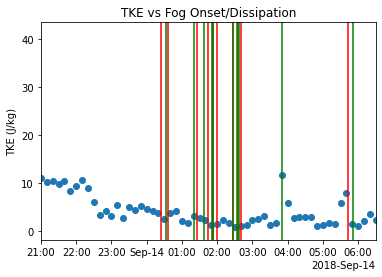

In [18]:
path = "/Users/adairkovac/dev/turbulence-CFOG-7710/calculations/calc_from_intermediate/tke_10/tke_10/tke_10/10/results-tke-10min.csv"
data = pd.read_csv(path, sep="\t", parse_dates=["time"])
import datetime
data["time"] = data["time"] 
plt.close()
fig, ax = plt.subplots()
plt.scatter(data["time"], data["tke"])

#ax.xaxis.set_major_formatter(mdates.ConciseDateConverter())

for line in formation:
    plt.axvline(line, color="red")
for line in dissipation:
    plt.axvline(line, color="green")
    
plt.xlim(pd.Timestamp('2018-09-13 21:00:00'), pd.Timestamp('2018-09-14 06:30:00'))
plt.title("TKE vs Fog Onset/Dissipation")
ax.set_ylabel("TKE (J/kg)")

In [7]:
data["time"]

0     2017-09-13 00:00:00.049999
1     2017-09-13 00:10:00.049999
2     2017-09-13 00:20:00.049999
3     2017-09-13 00:30:00.049999
4     2017-09-13 00:40:00.049999
                 ...            
283   2017-09-14 23:10:00.049999
284   2017-09-14 23:20:00.049999
285   2017-09-14 23:30:00.049999
286   2017-09-14 23:40:00.049999
287   2017-09-14 23:50:00.049999
Name: time, Length: 288, dtype: datetime64[ns]

/Users/adairkovac/.conda/envs/TetheredBalloon-7710/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/Users/adairkovac/dev/turbulence-CFOG-7710/CFOG_Q1.py:54: RuntimeWarning: invalid value encountered in double_scalars
  A_bar[i]=A_bar[i]/count
/Users/adairkovac/dev/turbulence-CFOG-7710/CFOG_Q1.py:54: RuntimeWarning: invalid value encountered in double_scalars
  A_bar[i]=A_bar[i]/count


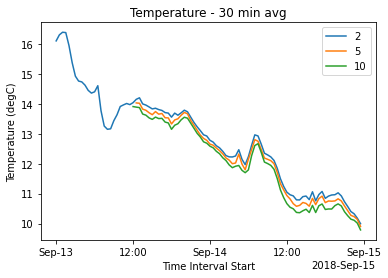

In [37]:
import CFOG_Q1 as cq

levels = [2, 5, 10]
sonic_data = dict()
for level in levels:
    sonic_data[level] = data_loader.load_processed_sonic_data(level, directory_override=False)

start_time = sonic_data[2].iloc[0]["time"] - datetime.timedelta(days = 366)
fig, ax = plt.subplots()
for level in levels:
    temp_avg_df = cq.compute_avg_with_start_times(start_time, "temp", sonic_data[level]["temp"])  
    plt.plot(temp_avg_df["time"], temp_avg_df["temp"], label=str(level))


ax.set_xlabel("Time Interval Start")
ax.set_ylabel("Temperature (degC)")
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.title("Temperature - 30 min avg")
plt.legend()

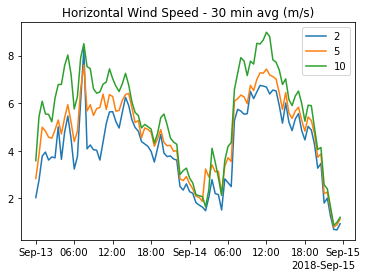

In [39]:
plt.close()
for level in levels:
    temp_avg_df = cq.compute_avg_with_start_times(start_time, "speed", sonic_data[level]["speed"])  
    plt.plot(temp_avg_df["time"], temp_avg_df["speed"], label=str(level))


ax.set_xlabel("Time Interval Start")
ax.set_ylabel("Horizontal Windspeed (m/s)")
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.title("Horizontal Wind Speed - 30 min avg (m/s)")
plt.legend()
plt.show()
plt.close()